## IMPORT REQUIRED PACKAGES

In [1]:
# Importing all required libraries
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
from matplotlib import pyplot as plt
warnings.filterwarnings("ignore")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
from lazypredict.Supervised import LazyClassifier

## IMPORT DATA

In [2]:
# Importing Given Dataset
rain_df=pd.read_csv('assignment2_australia_weather.csv')

In [3]:
# Creating a Copy of dataset to work on
aus_rain_df=rain_df

In [4]:
# Looking for the first few values
aus_rain_df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury    13.40    22.90      0.60          nan       nan   
1  2008-12-02   Albury     7.40    25.10      0.00          nan       nan   
2  2008-12-03   Albury    12.90    25.70      0.00          nan       nan   
3  2008-12-04   Albury     9.20    28.00      0.00          nan       nan   
4  2008-12-05   Albury    17.50    32.30      1.00          nan       nan   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  Pressure9am  \
0           W          44.00          W  ...       22.00      1007.70   
1         WNW          44.00        NNW  ...       25.00      1010.60   
2         WSW          46.00          W  ...       30.00      1007.60   
3          NE          24.00         SE  ...       16.00      1017.60   
4           W          41.00        ENE  ...       33.00      1010.80   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RISK_MM  \
0      1007.10      8.00       nan    16.90    21.80         No     0.00   
1      1007.80       nan       nan    17.20    24.30         No     0.00   
2      1008.70       nan      2.00    21.00    23.20         No     0.00   
3      1012.80       nan       nan    18.10    26.50         No     1.00   
4      1006.00      7.00      8.00    17.80    29.70         No     0.20   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 24 columns]

In [5]:
aus_rain_df.shape

(142193, 24)

# EDA

In [6]:
aus_rain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [7]:
# Print names for all columns
for names in aus_rain_df.columns:
    print(names)

Date
Location
MinTemp
MaxTemp
Rainfall
Evaporation
Sunshine
WindGustDir
WindGustSpeed
WindDir9am
WindDir3pm
WindSpeed9am
WindSpeed3pm
Humidity9am
Humidity3pm
Pressure9am
Pressure3pm
Cloud9am
Cloud3pm
Temp9am
Temp3pm
RainToday
RISK_MM
RainTomorrow


In [8]:
# Describing Continuous Data
aus_rain_df.describe(exclude=[object])

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count 141556.00 141871.00 140787.00     81350.00  74377.00      132923.00   
mean      12.19     23.23      2.35         5.47      7.62          39.98   
std        6.40      7.12      8.47         4.19      3.78          13.59   
min       -8.50     -4.80      0.00         0.00      0.00           6.00   
25%        7.60     17.90      0.00         2.60      4.90          31.00   
50%       12.00     22.60      0.00         4.80      8.50          39.00   
75%       16.80     28.20      0.80         7.40     10.60          48.00   
max       33.90     48.10    371.00       145.00     14.50         135.00   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count     140845.00     139563.00    140419.00    138583.00    128179.00   
mean          14.00         18.64        68.84        51.48      1017.65   
std            8.89          8.80        19.05        20.80         7.11   
min            0.00          0.00         0.00         0.00       980.50   
25%            7.00         13.00        57.00        37.00      1012.90   
50%           13.00         19.00        70.00        52.00      1017.60   
75%           19.00         24.00        83.00        66.00      1022.40   
max          130.00         87.00       100.00       100.00      1041.00   

       Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm   RISK_MM  
count    128212.00  88536.00  85099.00 141289.00 139467.00 142193.00  
mean       1015.26      4.44      4.50     16.99     21.69      2.36  
std           7.04      2.89      2.72      6.49      6.94      8.48  
min         977.10      0.00      0.00     -7.20     -5.40      0.00  
25%        1010.40      1.00      2.00     12.30     16.60      0.00  
50%        1015.20      5.00      5.00     16.70     21.10      0.00  
75%        1020.00      7.00      7.00     21.60     26.40      0.80  
max        1039.60      9.00      9.00     40.20     46.70    371.00

In [9]:
# Listing all continuous Variables
continous=[]
for item in aus_rain_df.columns:
    if aus_rain_df[item].dtypes!='O':
        continous.append(item)

print('Total Number of Continous Variables: ',len(continous),'\n')

for x in continous:
    print(x)

Total Number of Continous Variables:  17 

MinTemp
MaxTemp
Rainfall
Evaporation
Sunshine
WindGustSpeed
WindSpeed9am
WindSpeed3pm
Humidity9am
Humidity3pm
Pressure9am
Pressure3pm
Cloud9am
Cloud3pm
Temp9am
Temp3pm
RISK_MM


In [10]:
# Describing Categorical Data
aus_rain_df.describe(exclude=[float])

Date  Location WindGustDir WindDir9am WindDir3pm RainToday  \
count       142193    142193      132863     132180     138415    140787   
unique        3436        49          16         16         16         2   
top     2014-07-14  Canberra           W          N         SE        No   
freq            49      3418        9780      11393      10663    109332   

       RainTomorrow  
count        142193  
unique            2  
top              No  
freq         110316

In [11]:
# Listing all categorical Variables
categorical=[]
for item in aus_rain_df.columns:
    if aus_rain_df[item].dtypes=='O':
        categorical.append(item)

print('Total Number of categorical Variables: ',len(categorical),'\n')

for y in categorical:
    print(y)

Total Number of categorical Variables:  7 

Date
Location
WindGustDir
WindDir9am
WindDir3pm
RainToday
RainTomorrow


In [12]:
# Looking for all unique location
print(aus_rain_df['Location'].unique())

['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']


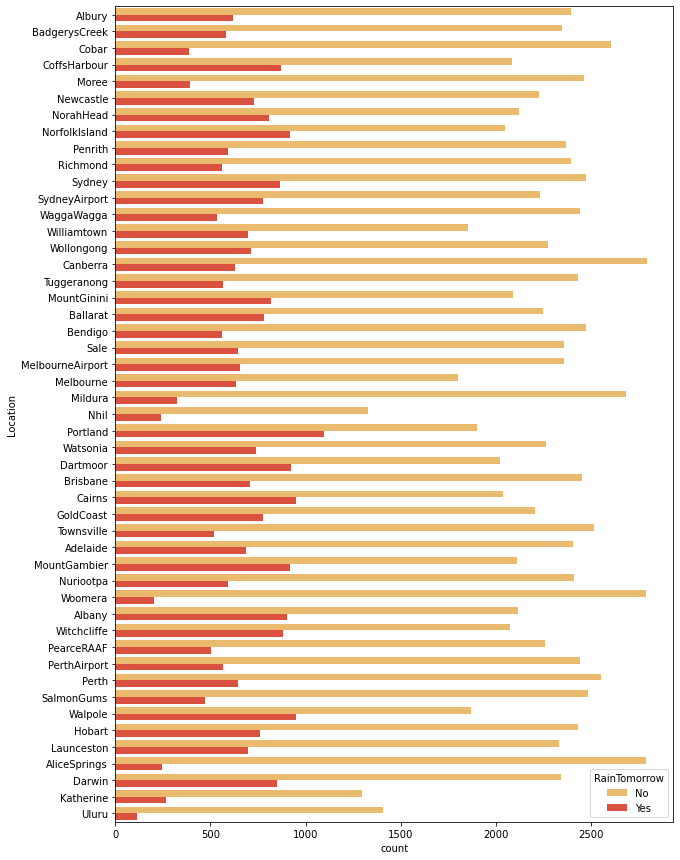

In [13]:
plt.figure(figsize = (10,15))
sns.countplot(y = 'Location',hue = 'RainTomorrow', data = aus_rain_df,palette='YlOrRd')
plt.show()

In [14]:
# Looking for all unique directions
print(aus_rain_df['WindGustDir'].unique())

['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'S' 'NW' 'SE' 'ESE'
 nan 'E' 'SSW']


In [15]:
aus_rain_df.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

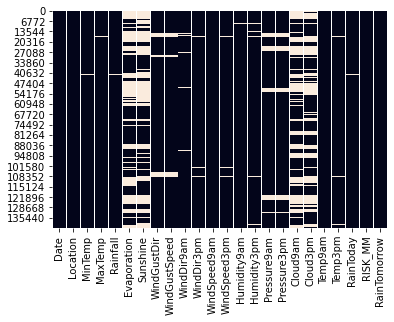

In [16]:
sns.heatmap(aus_rain_df.isnull(),cbar=False)
plt.show()

# FEATURE ENGINEERING

###### IMPUTATION

In [17]:
# Handling Numerical Imputation

for item in aus_rain_df.columns:
    if aus_rain_df[item].dtypes!='O':
        aus_rain_df[item].fillna(aus_rain_df[item].median(),inplace=True)

In [18]:
aus_rain_df.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir       9330
WindGustSpeed        0
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [19]:
# Handling Categorical Imputation

for item in aus_rain_df.columns:
    if aus_rain_df[item].dtypes=='O':
        aus_rain_df[item].fillna(aus_rain_df[item].value_counts().idxmax(),inplace=True)

In [20]:
aus_rain_df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

In [21]:
# Converting Variables into 0 & 1

from sklearn.preprocessing import LabelEncoder
label_weather=LabelEncoder()
aus_rain_df=aus_rain_df.apply(LabelEncoder().fit_transform)

In [22]:
# Used later in code to evaluate impact of outliers on model accuracy
wo_df= aus_rain_df

##### Handling Outliers

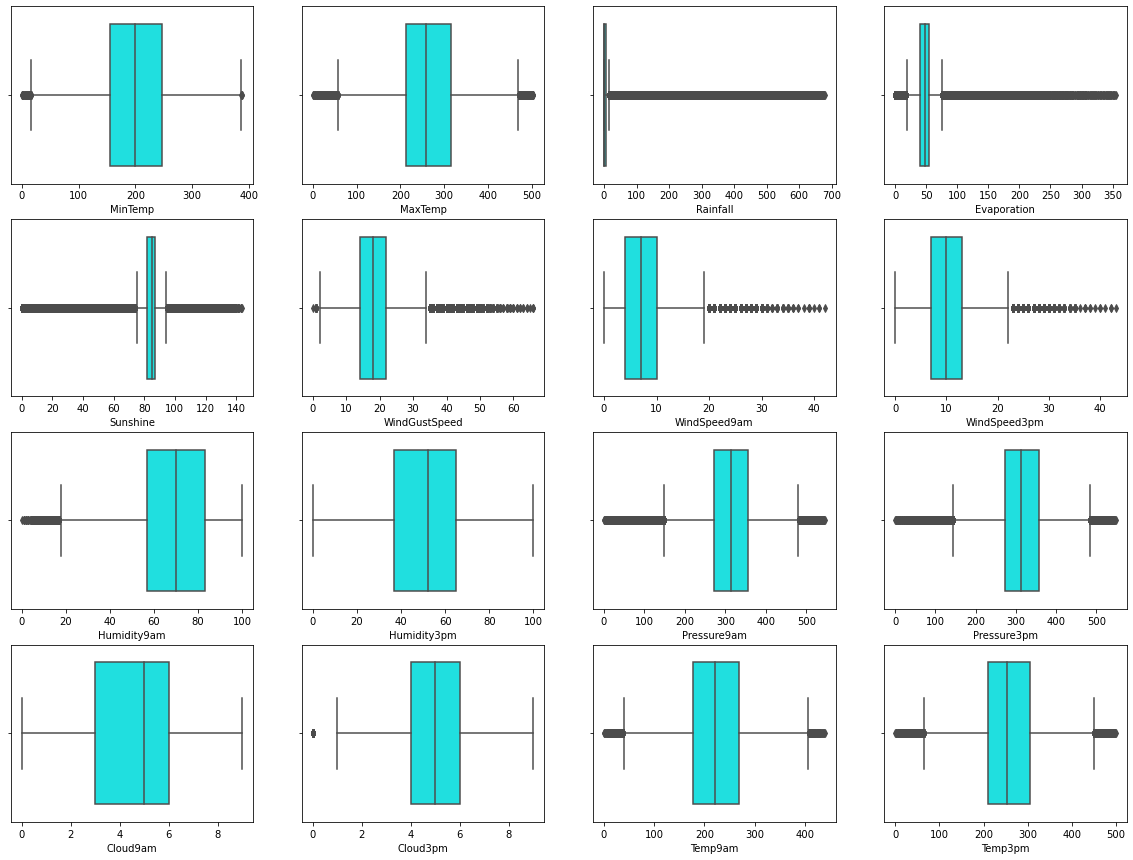

In [23]:
plt.figure(figsize = (20,15))
for i,col in enumerate(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation','Sunshine', 'WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']):
    plt.subplot(4,4,i+1)
    sns.boxplot(x = col, data = aus_rain_df,color='cyan')
    #plt.xlabel(col)
plt.show()

In [24]:
# Outlier Detection using Standard Deviation
factor=3
upper_lim=0
lower_lim=0

for item in aus_rain_df.columns:
    if aus_rain_df[item].dtypes!='O':
        upper_lim=aus_rain_df[item].mean() + aus_rain_df[item].std()*factor
        lower_lim=aus_rain_df[item].mean() - aus_rain_df[item].std()*factor
        aus_rain_df=aus_rain_df[(aus_rain_df[item]<upper_lim)&(aus_rain_df[item]>lower_lim)]

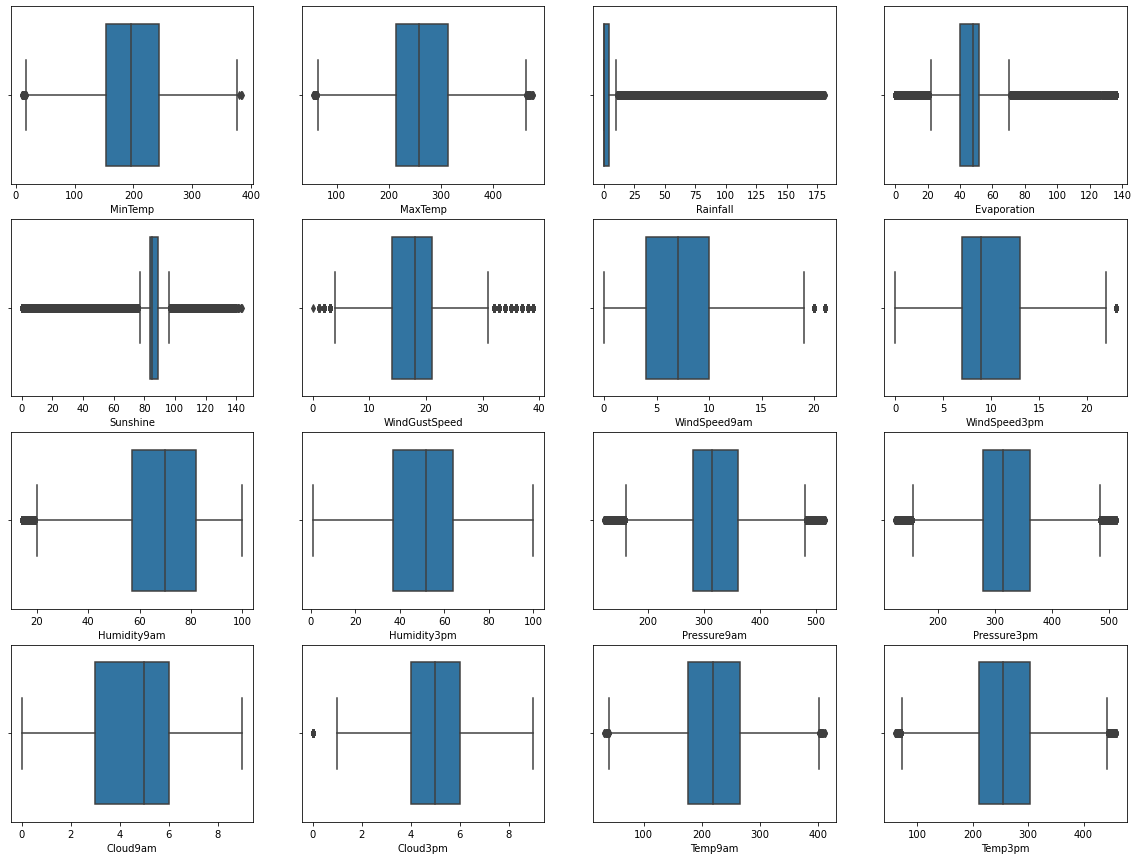

In [25]:
plt.figure(figsize = (20,15))
for i,col in enumerate(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation','Sunshine', 'WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']):
    plt.subplot(4,4,i+1)
    sns.boxplot(x = col, data = aus_rain_df)
    plt.xlabel(col)
plt.show()

In [26]:
aus_rain_df.shape

(128453, 24)

In [27]:
aus_rain_df.to_csv('aus_rain_df.csv')

In [28]:
aus_rain_df

Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0        396         2      213      262         6           48        85   
1        397         2      153      284         0           48        85   
2        398         2      208      290         0           48        85   
3        399         2      171      313         0           48        85   
4        400         2      254      356        10           48        85   
...      ...       ...      ...      ...       ...          ...       ...   
142188  3430        41      114      251         0           48        85   
142189  3431        41      107      267         0           48        85   
142190  3432        41      115      286         0           48        85   
142191  3433        41      133      302         0           48        85   
142192  3434        41      157      303         0           48        85   

        WindGustDir  WindGustSpeed  WindDir9am  ...  Humidity3pm  Pressure9am  \
0                13             21          13  ...           22          215   
1                14             21           6  ...           25          244   
2                15             22          13  ...           30          214   
3                 4             10           9  ...           16          314   
4                13             19           1  ...           33          246   
...             ...            ...         ...  ...          ...          ...   
142188            0             14           2  ...           27          385   
142189            0             14           9  ...           24          384   
142190            6              9           9  ...           21          373   
142191            3             17           9  ...           24          348   
142192            9             12          10  ...           24          332   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RISK_MM  \
0               232         8         5      223      261          0        0   
1               239         5         5      226      286          0        0   
2               248         5         2      264      275          0        0   
3               290         5         5      235      308          0       10   
4               221         7         8      232      340          0        2   
...             ...       ...       ...      ...      ...        ...      ...   
142188          375         5         5      148      252          0        0   
142189          366         5         5      155      267          0        0   
142190          354         5         5      163      288          0        0   
142191          331         5         5      179      304          0        0   
142192          327         3         2      205      303          0        0   

        RainTomorrow  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
142188             0  
142189             0  
142190             0  
142191             0  
142192             0  

[128453 rows x 24 columns]

# FEATURE SELECTION

In [29]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

A = aus_rain_df.iloc[:,1:-3]  #independent columns
B = aus_rain_df.iloc[:,-1]    #target column i.e RainTomorrow

#apply SelectKBest class to extract top 5 best features

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(A,B)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(A.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
feat_result=featureScores.nlargest(10,'Score') #print 10 best features
print(feat_result)

            Specs     Score
3        Rainfall 568349.14
13    Humidity3pm 148209.41
5        Sunshine  96624.95
19        Temp3pm  71508.58
14    Pressure9am  61390.27
2         MaxTemp  53847.43
15    Pressure3pm  49760.79
12    Humidity9am  29698.25
4     Evaporation  13975.94
7   WindGustSpeed   9453.33


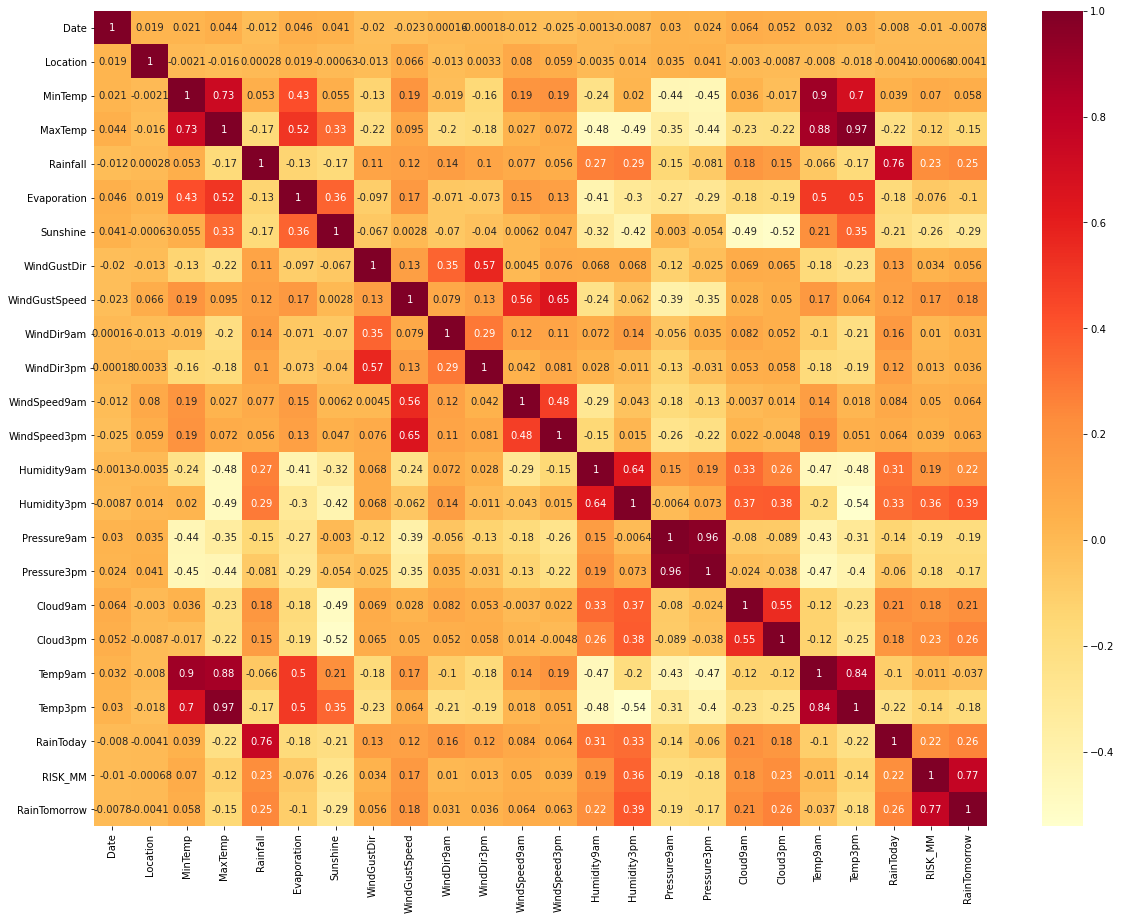

In [30]:
#get correlations of each features in dataset
corrmat = aus_rain_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,15))
#plot heat map
g=sns.heatmap(aus_rain_df[top_corr_features].corr(),annot=True,cmap="YlOrRd")

In [31]:
corr_matrix = aus_rain_df.corr()
corr_result=corr_matrix['RainTomorrow'].sort_values(ascending=False).head(10)
corr_result

RainTomorrow    1.00
RISK_MM         0.77
Humidity3pm     0.39
Cloud3pm        0.26
RainToday       0.26
Rainfall        0.25
Humidity9am     0.22
Cloud9am        0.21
WindGustSpeed   0.18
WindSpeed9am    0.06
Name: RainTomorrow, dtype: float64

In [32]:
# Creating Explanatory Variable

X= aus_rain_df[['Rainfall','Humidity3pm','Pressure9am','Pressure3pm','Sunshine','Temp3pm','MaxTemp','MinTemp','WindGustSpeed','RainToday','Cloud3pm','Humidity9am','Cloud9am']]   #target column i.e RainTomorrow

X.head()

Rainfall  Humidity3pm  Pressure9am  Pressure3pm  Sunshine  Temp3pm  \
0         6           22          215          232        85      261   
1         0           25          244          239        85      286   
2         0           30          214          248        85      275   
3         0           16          314          290        85      308   
4        10           33          246          221        85      340   

   MaxTemp  MinTemp  WindGustSpeed  RainToday  Cloud3pm  Humidity9am  Cloud9am  
0      262      213             21          0         5           71         8  
1      284      153             21          0         5           44         5  
2      290      208             22          0         2           38         5  
3      313      171             10          0         5           45         5  
4      356      254             19          0         8           82         7

In [33]:
# Creating Response Variable

Y = aus_rain_df["RainTomorrow"]
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: RainTomorrow, dtype: int32

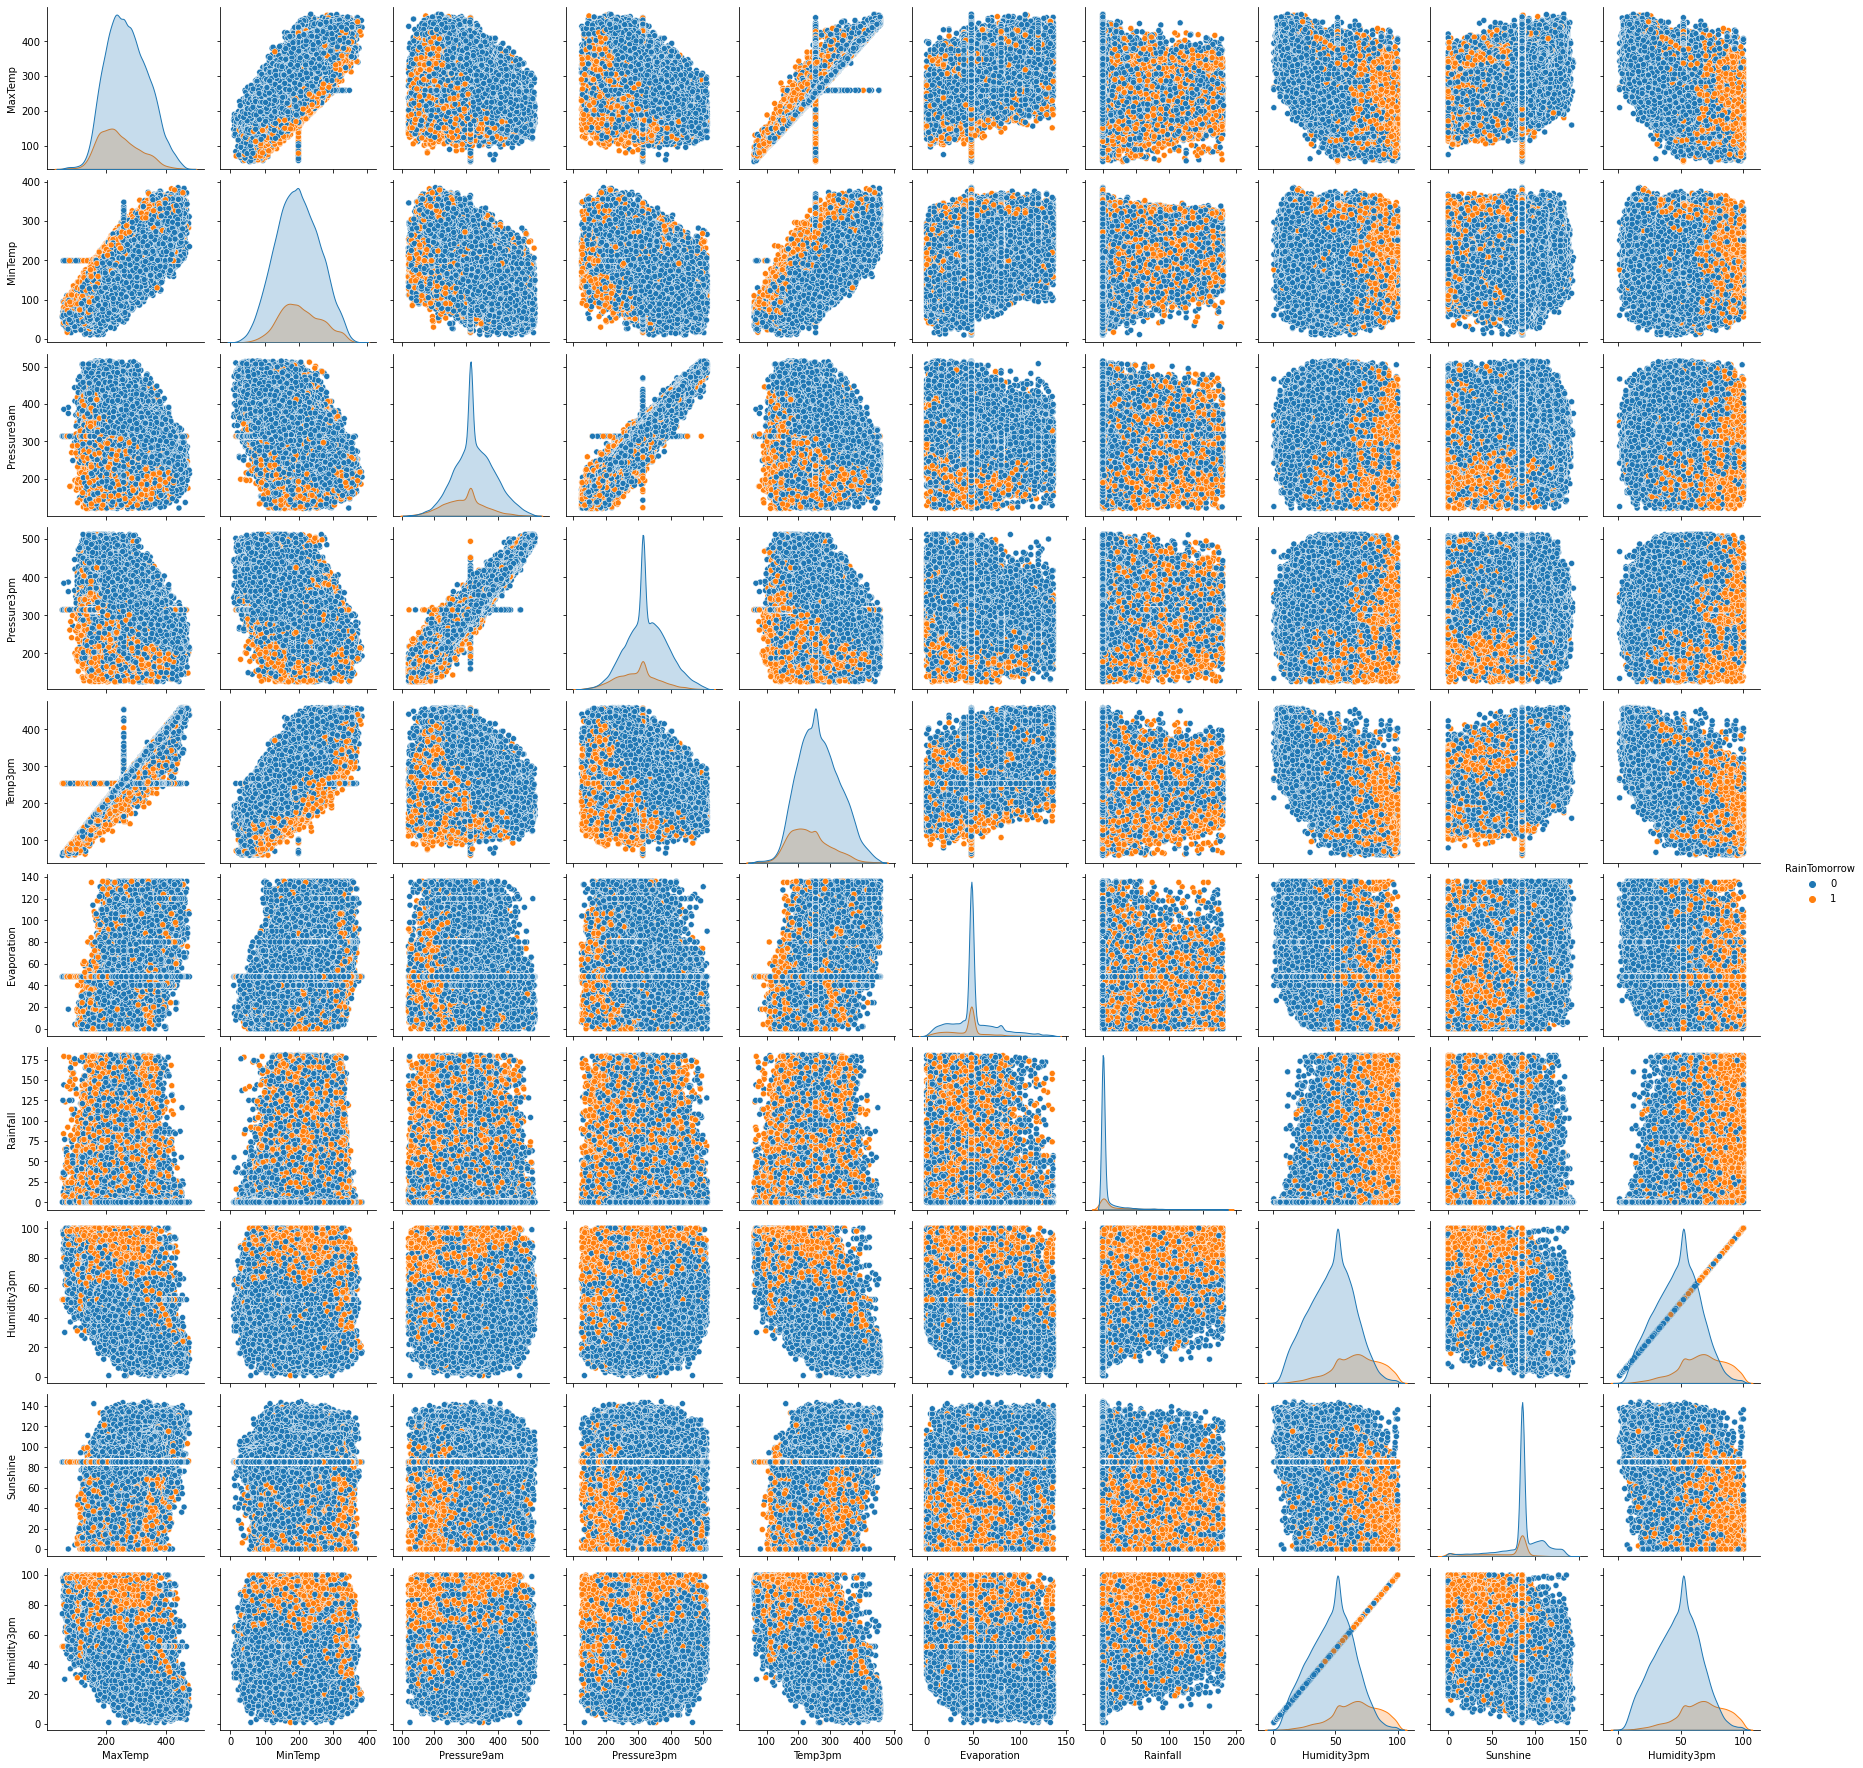

In [34]:
sns.pairplot( data=aus_rain_df, vars=('MaxTemp','MinTemp','Pressure9am','Pressure3pm', 'Temp3pm', 'Evaporation','Rainfall','Humidity3pm','Sunshine','Humidity3pm'), hue='RainTomorrow' )
plt.show()

# Normalization vs Standardization | Scaling Data  - Quantitative analysis

##### Standard Scaler (Standardization)

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

stan_scaler = StandardScaler()

stan_X= aus_rain_df[['Rainfall','Humidity3pm','Pressure9am','Pressure3pm','Sunshine','Temp3pm','MaxTemp','MinTemp','WindGustSpeed','RainToday','Cloud3pm','Humidity9am','Cloud9am']]
stan_Y= aus_rain_df["RainTomorrow"]

In [36]:
stan_X[['Rainfall','Humidity3pm','Pressure9am','Pressure3pm','Sunshine','Temp3pm','MaxTemp','MinTemp','WindGustSpeed','RainToday','Cloud3pm','Humidity9am','Cloud9am']]=stan_scaler.fit_transform(stan_X[['Rainfall','Humidity3pm','Pressure9am','Pressure3pm','Sunshine','Temp3pm','MaxTemp','MinTemp','WindGustSpeed','RainToday','Cloud3pm','Humidity9am','Cloud9am']])
stan_X.head()

Rainfall  Humidity3pm  Pressure9am  Pressure3pm  Sunshine  Temp3pm  \
0     -0.19        -1.48        -1.65        -1.37      0.14     0.03   
1     -0.40        -1.33        -1.19        -1.26      0.14     0.40   
2     -0.40        -1.07        -1.67        -1.12      0.14     0.24   
3     -0.40        -1.79        -0.09        -0.47      0.14     0.74   
4     -0.05        -0.91        -1.16        -1.55      0.14     1.22   

   MaxTemp  MinTemp  WindGustSpeed  RainToday  Cloud3pm  Humidity9am  Cloud9am  
0    -0.03     0.24           0.51      -0.49      0.17         0.11      1.49  
1     0.29    -0.72           0.51      -0.49      0.17        -1.38      0.18  
2     0.37     0.16           0.67      -0.49     -1.25        -1.71      0.18  
3     0.71    -0.43          -1.25      -0.49      0.17        -1.32      0.18  
4     1.34     0.89           0.19      -0.49      1.60         0.72      1.05

##### MinMax Scaler (Normalization)

In [37]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

MM_scaler = MinMaxScaler()

MM_X= aus_rain_df[['Rainfall','Humidity3pm','Pressure9am','Pressure3pm','Sunshine','Temp3pm','MaxTemp','MinTemp','WindGustSpeed','RainToday','Cloud3pm','Humidity9am','Cloud9am']]
MM_Y= aus_rain_df["RainTomorrow"]

In [38]:
MM_X[['Rainfall','Humidity3pm','Pressure9am','Pressure3pm','Sunshine','Temp3pm','MaxTemp','MinTemp','WindGustSpeed','RainToday','Cloud3pm','Humidity9am','Cloud9am']]=stan_scaler.fit_transform(MM_X[['Rainfall','Humidity3pm','Pressure9am','Pressure3pm','Sunshine','Temp3pm','MaxTemp','MinTemp','WindGustSpeed','RainToday','Cloud3pm','Humidity9am','Cloud9am']])
MM_X.head()

Rainfall  Humidity3pm  Pressure9am  Pressure3pm  Sunshine  Temp3pm  \
0     -0.19        -1.48        -1.65        -1.37      0.14     0.03   
1     -0.40        -1.33        -1.19        -1.26      0.14     0.40   
2     -0.40        -1.07        -1.67        -1.12      0.14     0.24   
3     -0.40        -1.79        -0.09        -0.47      0.14     0.74   
4     -0.05        -0.91        -1.16        -1.55      0.14     1.22   

   MaxTemp  MinTemp  WindGustSpeed  RainToday  Cloud3pm  Humidity9am  Cloud9am  
0    -0.03     0.24           0.51      -0.49      0.17         0.11      1.49  
1     0.29    -0.72           0.51      -0.49      0.17        -1.38      0.18  
2     0.37     0.16           0.67      -0.49     -1.25        -1.71      0.18  
3     0.71    -0.43          -1.25      -0.49      0.17        -1.32      0.18  
4     1.34     0.89           0.19      -0.49      1.60         0.72      1.05

# SPLIT DATA

In [39]:
from sklearn.model_selection import train_test_split

cX_train, cX_test, cY_train, cY_test = train_test_split(MM_X,MM_Y, test_size=0.2, random_state=100)

In [40]:
#pip install --user lazypredict

In [41]:
#pip install graphviz

In [42]:
clf = LazyClassifier(verbose=0,ignore_warnings=True,custom_metric=None)

#### MODEL SELECTION

In [43]:
models,predictions = clf.fit(cX_train, cX_test, cY_train, cY_test)

100%|██████████| 29/29 [08:45<00:00, 18.11s/it] 


In [44]:
models

Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
NearestCentroid                    0.76               0.74     0.74      0.78   
GaussianNB                         0.80               0.71     0.71      0.80   
QuadraticDiscriminantAnalysis      0.82               0.71     0.71      0.82   
XGBClassifier                      0.86               0.70     0.70      0.84   
LGBMClassifier                     0.86               0.69     0.69      0.84   
RandomForestClassifier             0.86               0.69     0.69      0.84   
BernoulliNB                        0.79               0.69     0.69      0.80   
LinearDiscriminantAnalysis         0.85               0.68     0.68      0.83   
ExtraTreesClassifier               0.86               0.68     0.68      0.84   
KNeighborsClassifier               0.84               0.68     0.68      0.83   
AdaBoostClassifier                 0.85               0.68     0.68      0.83   
LogisticRegression                 0.85               0.67     0.67      0.83   
BaggingClassifier                  0.85               0.67     0.67      0.83   
CalibratedClassifierCV             0.85               0.67     0.67      0.83   
DecisionTreeClassifier             0.79               0.67     0.67      0.79   
SVC                                0.86               0.66     0.66      0.83   
LinearSVC                          0.85               0.66     0.66      0.83   
ExtraTreeClassifier                0.78               0.65     0.65      0.78   
RidgeClassifier                    0.85               0.64     0.64      0.82   
RidgeClassifierCV                  0.85               0.64     0.64      0.82   
SGDClassifier                      0.84               0.60     0.60      0.80   
Perceptron                         0.81               0.58     0.58      0.78   
PassiveAggressiveClassifier        0.76               0.57     0.57      0.75   
DummyClassifier                    0.69               0.50     0.50      0.69   

                               Time Taken  
Model                                      
NearestCentroid                      0.13  
GaussianNB                           0.14  
QuadraticDiscriminantAnalysis        0.19  
XGBClassifier                        3.06  
LGBMClassifier                       0.61  
RandomForestClassifier              16.96  
BernoulliNB                          0.14  
LinearDiscriminantAnalysis           0.27  
ExtraTreesClassifier                10.34  
KNeighborsClassifier                24.00  
AdaBoostClassifier                   3.74  
LogisticRegression                   0.35  
BaggingClassifier                    5.88  
CalibratedClassifierCV              77.00  
DecisionTreeClassifier               0.97  
SVC                                357.93  
LinearSVC                           21.45  
ExtraTreeClassifier                  0.19  
RidgeClassifier                      0.17  
RidgeClassifierCV                    0.25  
SGDClassifier                        0.42  
Perceptron                           0.26  
PassiveAggressiveClassifier          0.27  
DummyClassifier                      0.10

In [45]:
# Identifying Top 10 Models
models['Accuracy'].sort_values(ascending=False).head(10)

Model
LGBMClassifier               0.86
XGBClassifier                0.86
RandomForestClassifier       0.86
ExtraTreesClassifier         0.86
SVC                          0.86
AdaBoostClassifier           0.85
CalibratedClassifierCV       0.85
LogisticRegression           0.85
LinearSVC                    0.85
LinearDiscriminantAnalysis   0.85
Name: Accuracy, dtype: float64

# MODEL CREATION

##### MODEL-1 RANDOM FOREST CLASSIFIER MODEL

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
# Model-1
classifier_rf=RandomForestClassifier(random_state=0,n_jobs=1,max_depth=5,n_estimators=100,oob_score=True,bootstrap=True)

In [48]:
%%time
classifier_rf.fit(cX_train, cY_train)

Wall time: 5.5 s


RandomForestClassifier(max_depth=5, n_jobs=1, oob_score=True, random_state=0)

In [49]:
# Checking the oob Score
classifier_rf.oob_score_

0.8457698370993169

##### MODEL-2 LOGISTIC REGRESSION MODEL

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
# Model-2
log_reg =LogisticRegression()

In [52]:
%%time
log_reg.fit(cX_train, cY_train)

Wall time: 208 ms


LogisticRegression()

In [53]:
log_reg.score(cX_train, cY_train)

0.8496525953173352

##### MODEL-3 DECISION TREE MODEL

In [54]:
from sklearn import tree

In [55]:
# Model-3
tree_model =tree.DecisionTreeClassifier()

In [56]:
%%time
tree_model.fit(cX_train, cY_train)

Wall time: 897 ms


DecisionTreeClassifier()

##### IMPACT ON MODEL ACCURACY WITHOUT FEATURE ENGINEERING

In [57]:
x= wo_df[['Rainfall','Humidity3pm','Pressure9am','Pressure3pm','Sunshine','Temp3pm','MaxTemp','MinTemp','WindGustSpeed','RainToday','Cloud3pm','Humidity9am','Cloud9am']]   #target column i.e RainTomorrow
y= wo_df["RainTomorrow"]

In [58]:
from sklearn.model_selection import train_test_split
woX_train, woX_test, woY_train, woY_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [59]:
wo=LogisticRegression()

In [60]:
wo.fit(woX_train, woY_train)

LogisticRegression()

In [61]:
wo.score(woX_train, woY_train)

0.8367266206023525

##### IMPACT ON MODEL ACCURACY WITHOUT DATA SCALING

In [62]:
from sklearn.model_selection import train_test_split
wsX_train, wsX_test, wsY_train, wsY_test = train_test_split(X,Y, test_size=0.2, random_state=0)

In [63]:
ws=LogisticRegression()

In [64]:
ws.fit(wsX_train, wsY_train)

LogisticRegression()

In [65]:
ws.score(wsX_train, wsY_train)

0.8481345244351025

##### Cross Validation

In [66]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv= ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

class_cv=cross_val_score(RandomForestClassifier(),cX_train, cY_train,cv=cv)
print(class_cv)
print('\nMean Score:\t',class_cv.mean())

[0.85729577 0.85860945 0.85719846 0.85851214 0.85471707]

Mean Score:	 0.8572665790882109


In [67]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv= ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

class_cv=cross_val_score(LogisticRegression(),cX_train, cY_train,cv=cv)
print(class_cv)
print('\nMean Score:\t',class_cv.mean())

[0.84853793 0.84868389 0.84887851 0.85145721 0.84761349]

Mean Score:	 0.8490342042524206


##### Hyper parameter Optimization

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

def find_best_model_using_gridsearchcv(cX_train, cY_train):
    algos = {
        'RandomForestClassifier' : {
            'model': RandomForestClassifier(),
            'params': {
                'n_estimators': [10, 100],
                #'max_depth':[1,2,3,4,5],
                'oob_score':[True, False],
                'n_jobs':[1,2],
                #'bootstrap':[True, False]
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(cX_train, cY_train)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(cX_train, cY_train)

model  best_score  \
0  RandomForestClassifier        0.86   

                                         best_params  
0  {'n_estimators': 100, 'n_jobs': 1, 'oob_score'...

# PREDICTION

In [69]:
# For Random Forest Model
Y_pred_rf = classifier_rf.predict(cX_test)
Y_pred_rf

array([0, 0, 0, ..., 0, 0, 0])

In [70]:
Y_pred_rf_prob=classifier_rf.predict_proba(cX_test)[:,-1]
Y_pred_rf_prob

array([0.06436673, 0.18182114, 0.10510912, ..., 0.10333745, 0.07381122,
       0.37669964])

In [71]:
final_df=rain_df[['Rainfall','Humidity3pm','Pressure9am','Pressure3pm','Sunshine','Temp3pm','MaxTemp','MinTemp','WindGustSpeed','RainToday','Cloud3pm','Humidity9am','Cloud9am']]
final_df

Rainfall  Humidity3pm  Pressure9am  Pressure3pm  Sunshine  Temp3pm  \
0           0.60        22.00      1007.70      1007.10      8.50    21.80   
1           0.00        25.00      1010.60      1007.80      8.50    24.30   
2           0.00        30.00      1007.60      1008.70      8.50    23.20   
3           0.00        16.00      1017.60      1012.80      8.50    26.50   
4           1.00        33.00      1010.80      1006.00      8.50    29.70   
...          ...          ...          ...          ...       ...      ...   
142188      0.00        27.00      1024.70      1021.20      8.50    20.90   
142189      0.00        24.00      1024.60      1020.30      8.50    22.40   
142190      0.00        21.00      1023.50      1019.10      8.50    24.50   
142191      0.00        24.00      1021.00      1016.80      8.50    26.10   
142192      0.00        24.00      1019.40      1016.50      8.50    26.00   

        MaxTemp  MinTemp  WindGustSpeed RainToday  Cloud3pm  Humidity9am  \
0         22.90    13.40          44.00        No      5.00        71.00   
1         25.10     7.40          44.00        No      5.00        44.00   
2         25.70    12.90          46.00        No      2.00        38.00   
3         28.00     9.20          24.00        No      5.00        45.00   
4         32.30    17.50          41.00        No      8.00        82.00   
...         ...      ...            ...       ...       ...          ...   
142188    21.80     3.50          31.00        No      5.00        59.00   
142189    23.40     2.80          31.00        No      5.00        51.00   
142190    25.30     3.60          22.00        No      5.00        56.00   
142191    26.90     5.40          37.00        No      5.00        53.00   
142192    27.00     7.80          28.00        No      2.00        51.00   

        Cloud9am  
0           8.00  
1           5.00  
2           5.00  
3           5.00  
4           7.00  
...          ...  
142188      5.00  
142189      5.00  
142190      5.00  
142191      5.00  
142192      3.00  

[142193 rows x 13 columns]

In [72]:
# Converting Variables into 0 & 1

from sklearn.preprocessing import LabelEncoder
label_weather=LabelEncoder()
final_df=final_df.apply(LabelEncoder().fit_transform)

In [73]:
final_prediction=classifier_rf.predict(final_df)

final_prediction

array([1, 1, 1, ..., 1, 1, 1])

In [74]:
rain_df['RainTomorrow_Prediction']=final_prediction

In [75]:
# Converting Variables into 0 & 1

from sklearn.preprocessing import LabelEncoder
label_weather=LabelEncoder()
rain_df=rain_df.apply(LabelEncoder().fit_transform)

In [76]:
rain_df

Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0        396         2      213      262         6           48        85   
1        397         2      153      284         0           48        85   
2        398         2      208      290         0           48        85   
3        399         2      171      313         0           48        85   
4        400         2      254      356        10           48        85   
...      ...       ...      ...      ...       ...          ...       ...   
142188  3430        41      114      251         0           48        85   
142189  3431        41      107      267         0           48        85   
142190  3432        41      115      286         0           48        85   
142191  3433        41      133      302         0           48        85   
142192  3434        41      157      303         0           48        85   

        WindGustDir  WindGustSpeed  WindDir9am  ...  Pressure9am  Pressure3pm  \
0                13             21          13  ...          215          232   
1                14             21           6  ...          244          239   
2                15             22          13  ...          214          248   
3                 4             10           9  ...          314          290   
4                13             19           1  ...          246          221   
...             ...            ...         ...  ...          ...          ...   
142188            0             14           2  ...          385          375   
142189            0             14           9  ...          384          366   
142190            6              9           9  ...          373          354   
142191            3             17           9  ...          348          331   
142192            9             12          10  ...          332          327   

        Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RISK_MM  \
0              8         5      223      261          0        0   
1              5         5      226      286          0        0   
2              5         2      264      275          0        0   
3              5         5      235      308          0       10   
4              7         8      232      340          0        2   
...          ...       ...      ...      ...        ...      ...   
142188         5         5      148      252          0        0   
142189         5         5      155      267          0        0   
142190         5         5      163      288          0        0   
142191         5         5      179      304          0        0   
142192         3         2      205      303          0        0   

        RainTomorrow  RainTomorrow_Prediction  
0                  0                        1  
1                  0                        1  
2                  0                        1  
3                  0                        1  
4                  0                        1  
...              ...                      ...  
142188             0                        1  
142189             0                        1  
142190             0                        1  
142191             0                        1  
142192             0                        1  

[142193 rows x 25 columns]

#### Comparing with Other Model

In [77]:
# For Logistic Regression
Y_pred_logreg=log_reg.predict(cX_test)
Y_pred_logreg

array([0, 0, 0, ..., 0, 0, 0])

In [78]:
Y_pred_logreg_prob=log_reg.predict_proba(cX_test)[:,-1]
Y_pred_logreg_prob

array([0.0196683 , 0.24973144, 0.05881984, ..., 0.09781395, 0.09789276,
       0.4187318 ])

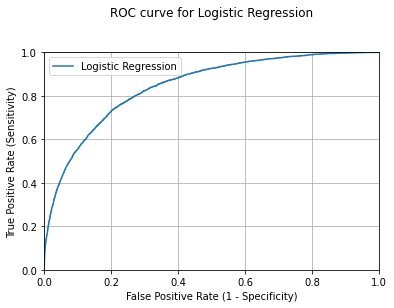

In [79]:
from sklearn.metrics import roc_curve
# IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = roc_curve(cY_test, Y_pred_logreg_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Logistic Regression\n\n')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.legend(['Logistic Regression'])
plt.show()

In [80]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(cY_test, Y_pred_rf_prob))

0.8333967280878669


In [81]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(cY_test, Y_pred_logreg_prob))

0.8456429391696809


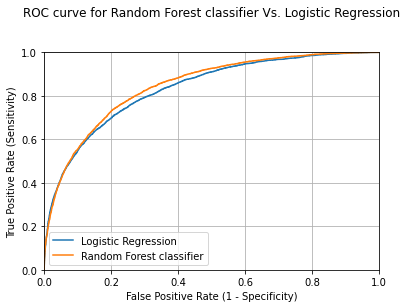

In [82]:
from sklearn.metrics import roc_curve

fprdt, tprdt, thresholdsdt = roc_curve(cY_test, Y_pred_rf_prob)
plt.plot(fprdt, tprdt)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Random Forest classifier Vs. Logistic Regression\n\n')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.legend(['Logistic Regression','Random Forest classifier'])
plt.show()

In [83]:
thresholdsdt

array([1.83659873, 0.83659873, 0.81458716, ..., 0.03640827, 0.03630271,
       0.03610067])

# PERFORMANCE METRICS

##### Random Forest Classifier 

In [84]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [85]:
confusion_matrix_rf = confusion_matrix(cY_test, Y_pred_rf)
confusion_matrix_rf

array([[20441,   390],
       [ 3521,  1339]], dtype=int64)

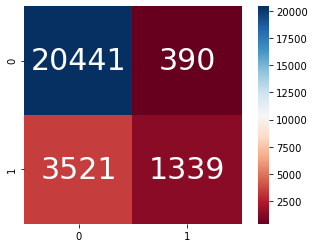

In [86]:
sns.heatmap(confusion_matrix_rf,annot=True, annot_kws={'size':30}, cmap='RdBu', square=True,fmt='.0f')
plt.show()

In [87]:
TN = confusion_matrix_rf[0, 0]
FP = confusion_matrix_rf[0, 1]
FN = confusion_matrix_rf[1, 0]
TP = confusion_matrix_rf[1, 1]

print('True Negative  : ',TN)
print('False Positive : ',FP)
print('False Negative : ',FN)
print('True Positive  : ',TP)

True Negative  :  20441
False Positive :  390
False Negative :  3521
True Positive  :  1339


In [88]:
rf_report = classification_report(cY_test, Y_pred_rf)
print(rf_report)

              precision    recall  f1-score   support

           0       0.85      0.98      0.91     20831
           1       0.77      0.28      0.41      4860

    accuracy                           0.85     25691
   macro avg       0.81      0.63      0.66     25691
weighted avg       0.84      0.85      0.82     25691



In [89]:
from sklearn.metrics import accuracy_score

print('Accuracy Score : ',accuracy_score(cY_test, Y_pred_rf))

Accuracy Score :  0.8477677007512359


In [90]:
# Matching Classification Accuracy with above results

print('Accuracy Score (Calculated Manually) : ',(TP + TN) / float(TP + TN + FP + FN))

Accuracy Score (Calculated Manually) :  0.8477677007512359


In [91]:
# Classification Error
print('Classification Error :\n')
print('Using Formula : ',(FP + FN) / float(TP + TN + FP + FN))
print('Using Function : ',1 - accuracy_score(cY_test, Y_pred_rf))

Classification Error :

Using Formula :  0.15223229924876416
Using Function :  0.15223229924876414


In [92]:
from sklearn.metrics import recall_score

# Recall Score
print('Recall Score :\n')
print('Using Formula : ',TP / float(TP + FN))
print('Using Function : ',recall_score(cY_test, Y_pred_rf))

Recall Score :

Using Formula :  0.2755144032921811
Using Function :  0.2755144032921811


In [93]:
# Specificity

print('Specificity : ',TN / float(TN + FP))

Specificity :  0.9812779031251501


In [94]:
# False Positive Rate
print('False Positive Rate : ',FP / float(TN + FP))

False Positive Rate :  0.018722096874849985


In [95]:
# Precision Score

from sklearn.metrics import precision_score
print('Precision Score :\n')
print('Using Formula : ',TP / float(TP + FP))
print('Using Function : ',precision_score(cY_test, Y_pred_rf))

Precision Score :

Using Formula :  0.7744360902255639
Using Function :  0.7744360902255639
